In [1]:
import pandas as pd
import nltk #procesamiento de palabras
from nltk.corpus import stopwords
import gensim #pip install gensim sirve separa texto 
import re #sirve para concatenar texto

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #crear los stopwords #pip intall wordcloud
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tuits_bayes.csv", encoding ="latin-1")
df.head(10)

,status_id,screen_name,text
0,832421505778618368,lopezobrador_,Josefina Vázquez Mota debe informar qué hizo c...
1,833130565087985664,lopezobrador_,Ya ni la burla perdonan: bajaron 2 centavos la...
2,833501308548177921,lopezobrador_,Martín Moreno no votará por mí. Comprendo. Es ...
3,833895239211364357,lopezobrador_,En Chicago dije que iremos a Nueva York (ONU) ...
4,834183763923841024,lopezobrador_,Entérate y apoya con tu firma la denuncia cont...
5,834565985583525888,lopezobrador_,"Qué república ni qué ocho cuartos, es la monar..."
6,835297483521564672,lopezobrador_,"Salieron a defender a Yunes Linares, Calderón,..."
7,835903628388990976,lopezobrador_,"En 2010, la trasnacional Odebrecht entregó sob..."
8,836417496420925440,lopezobrador_,Calderón dice donará su sueldo como expresiden...
9,836745914022682624,lopezobrador_,¡Las pensiones de los expresidentes de México ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    1349 non-null   int64 
 1   screen_name  1349 non-null   object
 2   text         1349 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.7+ KB


In [4]:
black_list = ['más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a', 'compa','si'] #agregar palabras a la lista negra
def cleaner(word): #limpia todas las las palabras no alfanumericas, convierte en miniscula, quita puntuación, etc
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'CR', 'cr', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "): #coloca en minuscula las palabras
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

    
  bigram_list = bigram[list_word_clean]
  out_text = " ".join(bigram_list) #unifica todas las palabras por bigramas
  return out_text

In [5]:
len(df.text.to_list())

1349

In [6]:
%%time
bigram = gensim.models.Phrases(df.text.to_list()) #separa las palabras eb comas

CPU times: user 85.1 ms, sys: 1.49 ms, total: 86.6 ms
Wall time: 85.6 ms


In [7]:
bigram[df.text.to_list()[500].split()]

['#Sorpréndete',
 'con',
 'una',
 'nueva',
 'manera',
 'de',
 'editar',
 'tus',
 'ideas',
 'en',
 'Word:',
 'resalta,',
 'tacha,',
 'borra',
 'y',
 'anota',
 'con',
 '#WindowsInk.',
 'https://t.co/Pla3vNJVFE',
 'https://t.co/5AKbV5hxyT']

In [8]:
nltk.download('stopwords')
stop = set(stopwords.words('spanish')) #quita palabras comunes del español con, a, del, que, 
adicional_palabras=set(black_list) #aplica el stopword
stopwords = stop.union(adicional_palabras) #une el stop de palabras mas la black lista

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ff_didier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
%%time
df['text'] = df['text'].apply(cleaner)

CPU times: user 42.9 ms, sys: 1.25 ms, total: 44.2 ms
Wall time: 43.3 ms


In [10]:
df['text'] 

0       josefina vazquez mota debe informar hizo mil m...
1       burla perdonan bajaron centavos gasolina guate...
2       martin moreno votara comprendo mal escritor de...
3       chicago dije iremos nueva york onu washington ...
4       enterate apoya firma denuncia ordenes donald t...
                              ...                        
1344                  cosas puede hacer simplemente rinde
1345               ser feliz implica aceptar limitaciones
1346                                               parece
1347              empiezas acordar cosas hiciste ebriedad
1348                                       fulvio martins
Name: text, Length: 1349, dtype: object

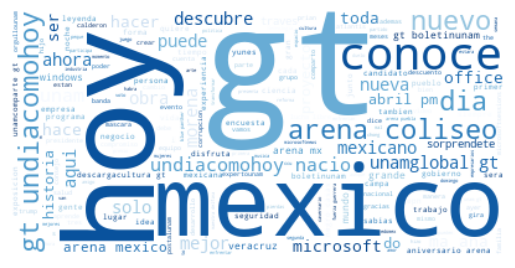

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output



text = df[df.screen_name=='lopezobrador_'].screen_name.tolist() #filtrar candidato
text2 = ' '.join(df['text']) #texto chorreado

wordcloud = WordCloud(stopwords = stopwords,
                      collocations=True,
                      colormap='Blues',
                      background_color="white").generate(str(text2))

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
#fig.savefig("nube_palabras.png", dpi=900)

In [12]:
text2

'josefina vazquez mota debe informar hizo mil millones pesos autorizo epn basta corrupcion hipocresia prianista burla perdonan bajaron centavos gasolina guatemala petroleo barata gasolina mexico corruptos martin moreno votara comprendo mal escritor dedicado explotar ignorancia conservadurismo sociedad gracias chicago dije iremos nueva york onu washington cidh marzo denunciar ordenes trump enterate apoya firma denuncia ordenes donald trump republica ocho cuartos monarquia moronga azul corrupta hipocrita salieron defender yunes linares calderon esposa anaya pri cosa llama fepade fin toda maleantada trasnacional odebrecht entrego sobornos operar planta petroquimica mexico debe investigarse calderon socios calderon dice donara sueldo expresidente recibe pension mdp costara mantenerlo millones pensiones expresidentes mexico obama comparto alegria pueblo valle chalco aun pgr servicio prian presentara denuncia josefina vazquez mota mil millones autorizo epn pronto terminara privilegios peque 

In [13]:
### creando el diccionario de las palabras 
texto_diccionario = wordcloud.process_text(text2) #procesar el texto a diccionario ('josefina': 5, 'vazquez': 1, 'debe': 13)
# ordenar el diccionario
frecuencia={k: v for k, v in sorted(texto_diccionario.items(),reverse=True, key=lambda item: item[1])} #ordena el diccionario

print(list(frecuencia.items())[:10])


[('gt', 119), ('hoy', 76), ('mexico', 75), ('conoce', 48), ('arena coliseo', 44), ('dia', 43), ('nuevo', 43), ('gt undiacomohoy', 42), ('undiacomohoy nacio', 39), ('unam', 37)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'gt'),
  Text(1, 0, 'hoy'),
  Text(2, 0, 'mexico'),
  Text(3, 0, 'conoce'),
  Text(4, 0, 'arena coliseo'),
  Text(5, 0, 'dia'),
  Text(6, 0, 'nuevo'),
  Text(7, 0, 'gt undiacomohoy'),
  Text(8, 0, 'undiacomohoy nacio'),
  Text(9, 0, 'unam')])

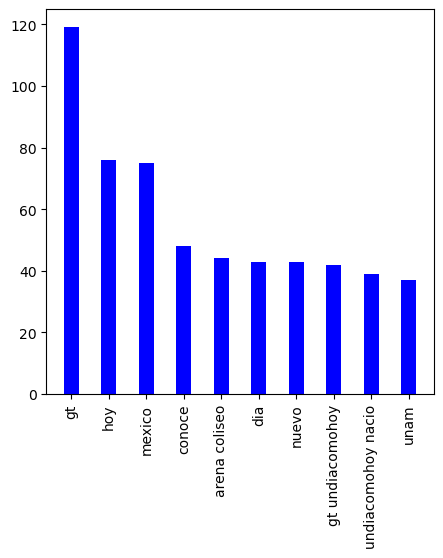

In [14]:
palabras = list(frecuencia.keys())[:10] #obtengo las palbras
cantidad = list(frecuencia.values())[:10] #obtengo los valores

fig = plt.figure(figsize = (5, 5)) 
  
# creando el mapa
plt.bar(palabras, cantidad, color ='blue',  
        width = 0.4)
plt.xticks(rotation=90)

In [15]:
#pip install keras tensorflow
#pip install sentiment-analysis-spanish

from sentiment_analysis_spanish import sentiment_analysis

In [16]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("cual es el horario?"))


0.3447696989949435


/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dataScience/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
print(sentiment.sentiment("me parece terrible esto que me estás diciendo"))

2.1830853580533075e-06
